# Calculation of the Secrecy Capacity

In the following, you will find two algorithms that allow calculating the secrecy capacity of a wiretap channel.

The first one is presented in the following publication
> S. Loyka and C. D. Charalambous, "An Algorithm for Global Maximization of Secrecy Rates in Gaussian MIMO Wiretap Channels," IEEE Trans. Commun., vol. 63, no. 6, pp. 2288–2299, Jun. 2015.

The second is from the publication
> T. Van Nguyen, Q.-D. Vu, M. Juntti, and L.-N. Tran, "A Low-Complexity Algorithm for Achieving Secrecy Capacity in MIMO Wiretap Channels," in ICC 2020 - 2020 IEEE International Conference on Communications (ICC), 2020, pp. 1–6.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()

from calculations_physec import secrecy_rate

## Preparation

In [2]:
# Number of Antennas
n_tx = 4
n_bob = 5
n_eve = 2

# (Random) Channel matrices
mat_bob = np.random.randn(n_bob, n_tx)
mat_eve = np.random.randn(n_eve, n_tx)

In [3]:
opt_cov = {}
sec_capac = {}
snr = np.arange(0, 11, 2)

### Algorithm 1

In [4]:
from loyka_algorithm import secrecy_capacity_wtc_loyka

In [5]:
opt_cov[1] = []
sec_capac[1] = []
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov, interm_res_norm, interm_sec_rate = secrecy_capacity_wtc_loyka(mat_bob, mat_eve, power=power, step_size=2, alpha=.1, beta=.5)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f} bit".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.trace(_opt_cov)))
    opt_cov[1].append(_opt_cov)
    sec_capac[1].append(_sec_cap)

Working on SNR: 0 dB
Secrecy capacity: 4.498 bit
Power constraint: 1.000.	Trace of Cov: 1.000
Working on SNR: 2 dB
Secrecy capacity: 5.493 bit
Power constraint: 1.585.	Trace of Cov: 1.585
Working on SNR: 4 dB
Secrecy capacity: 6.524 bit
Power constraint: 2.512.	Trace of Cov: 2.512
Working on SNR: 6 dB
Secrecy capacity: 7.595 bit
Power constraint: 3.981.	Trace of Cov: 3.981
Working on SNR: 8 dB
Secrecy capacity: 8.801 bit
Power constraint: 6.310.	Trace of Cov: 6.310
Working on SNR: 10 dB
Secrecy capacity: 10.118 bit
Power constraint: 10.000.	Trace of Cov: 10.000


### Algorithm 2

In [8]:
from low_compl import secrecy_capacity_low_complexity

In [9]:
opt_cov[2] = []
sec_capac[2] = []
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov = secrecy_capacity_low_complexity(mat_bob, mat_eve, power)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f}".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.real_if_close(np.trace(_opt_cov))))
    opt_cov[2].append(_opt_cov)
    sec_capac[2].append(_sec_cap)

Working on SNR: 0 dB
Secrecy capacity: 4.498
Power constraint: 1.000.	Trace of Cov: 1.000
Working on SNR: 2 dB
Secrecy capacity: 5.493
Power constraint: 1.585.	Trace of Cov: 1.585
Working on SNR: 4 dB
Secrecy capacity: 6.524
Power constraint: 2.512.	Trace of Cov: 2.512
Working on SNR: 6 dB
Secrecy capacity: 7.593
Power constraint: 3.981.	Trace of Cov: 3.981
Working on SNR: 8 dB
Secrecy capacity: 8.799
Power constraint: 6.310.	Trace of Cov: 6.310
Working on SNR: 10 dB
Secrecy capacity: 10.116
Power constraint: 10.000.	Trace of Cov: 10.000


## Results

In [10]:
def plot_results(results):
    fig, axs = plt.subplots(num="Secrecy Capacity Results")
    axs.plot(snr, results[1], label="Loyka Algorithm")
    axs.plot(snr, results[2], label="Low Complexity Algorithm")
    axs.legend()

<IPython.core.display.Javascript object>


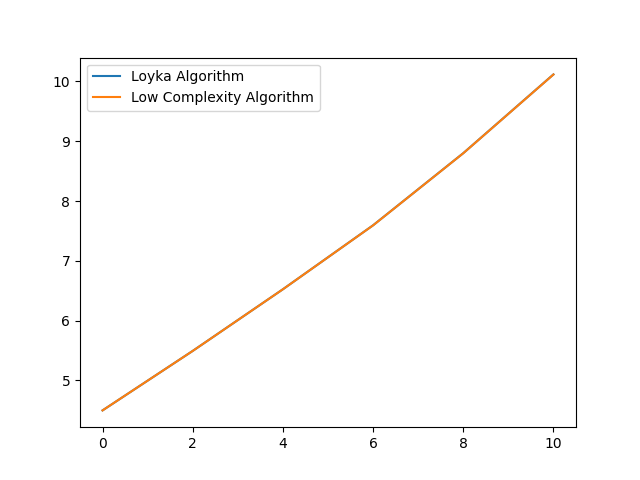

In [11]:
plot_results(sec_capac)

In [18]:
def plot_loyka_progress(res_norm, sec_rate):
    fig, axs = plt.subplots(num="Loyka Algorithm Progress")
    axs.semilogy(res_norm, label="Norm of the Residual")
    axs2 = axs.twinx()
    axs2.plot(sec_rate, c='orange', label="Secrecy Rate")
    fig.legend()

In [21]:
plot_loyka_progress(interm_res_norm, interm_sec_rate)

NameError: name 'interm_res_norm' is not defined